In [1]:
#import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_excel("C:\\Users\\dell\\Machine Learning Assignment\\26-Apr\\dataset.xlsx")
data

missing_data = data.isna().sum()/data.shape[0] #sum() to count the number of missing values in each column
#print(data.isnull().mean())                   #mean() to calculate the fraction of missing values in each column

# set the display options to show all columns
pd.set_option('display.max_columns', None) #Displays all columns in a dataframe, without truncation
pd.set_option('display.max_rows', None)    #Displays all rows in a dataframe, without truncation
pd.set_option('display.width', None)       #Displays the dataframe without line wrapping
pd.set_option('display.max_colwidth', -1)  #Displays all the text in each cell, without truncation

print(missing_data)

#Selects the columns with missing data between 86% and 90% and assigns them to a list called "blood"

blood = list(data.columns[(missing_data > 0.86) & (missing_data < 0.9)])
print(blood)


#Selecting columns with missing values greater than 70% and less than 80%

virus = list(data.columns[(missing_data > 0.7) & (missing_data < 0.8)])
print(virus)

X = data[blood + virus]
y = data['SARS-Cov-2 exam result']

from sklearn.model_selection import train_test_split

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

<ipython-input-1-ddcb5f35e478>:18: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  pd.set_option('display.max_colwidth', -1)  #Displays all the text in each cell, without truncation


Patient ID                                               0.000000
Patient age quantile                                     0.000000
SARS-Cov-2 exam result                                   0.000000
Patient addmited to regular ward (1=yes, 0=no)           0.000000
Patient addmited to semi-intensive unit (1=yes, 0=no)    0.000000
Patient addmited to intensive care unit (1=yes, 0=no)    0.000000
Hematocrit                                               0.893161
Hemoglobin                                               0.893161
Platelets                                                0.893338
Mean platelet volume                                     0.893870
Red blood Cells                                          0.893338
Lymphocytes                                              0.893338
Mean corpuscular hemoglobin concentration (MCHC)         0.893338
Leukocytes                                               0.893338
Basophils                                                0.893338
Mean corpu

In [2]:
# Encode categorical variables in X_train and X_test
def encode(data): 
    encoder = {"not_detected": 0, "negative": 0, "detected": 1, "positive": 1}
    for column in data.select_dtypes(include=['object']):
        data.loc[:, column] = data[column].map(encoder)
    return data

X_train_encoded = encode(X_train)
X_test_encoded = encode(X_test)

from sklearn.impute import KNNImputer

# Instantiate KNNImputer with n_neighbors = 5
imputer = KNNImputer(n_neighbors=5, weights='distance', metric='nan_euclidean', add_indicator=False, copy=True, missing_values=np.nan)

# Fit the imputer on X_train_encoded
imputer.fit(X_train_encoded)

# Transform both X_train_encoded and X_test_encoded using the imputer
X_train_imputed = imputer.transform(X_train_encoded)
X_test_imputed = imputer.transform(X_test_encoded)


In [3]:
#Smote analysis

from imblearn.over_sampling import SMOTE

# Apply SMOTE oversampling to X_train_imputed and y_train
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_imputed, y_train)


Logistic Regression
Accuracy: 0.8034
Confusion matrix:
[[885 133]
 [ 89  22]]
F1 score: 0.1654
Recall score: 0.1982
Precision score: 0.1419
--------------


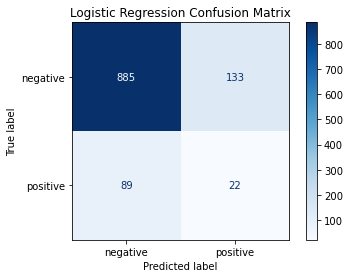

K Nearest Neighbors
Accuracy: 0.2516
Confusion matrix:
[[180 838]
 [  7 104]]
F1 score: 0.1975
Recall score: 0.9369
Precision score: 0.1104
--------------


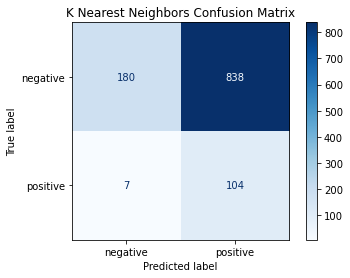

Decision Tree
Accuracy: 0.2657
Confusion matrix:
[[201 817]
 [ 12  99]]
F1 score: 0.1928
Recall score: 0.8919
Precision score: 0.1081
--------------


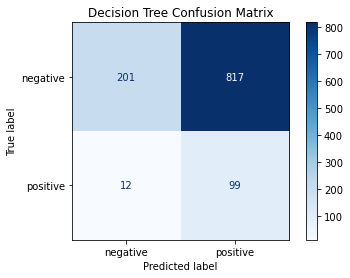

Random Forest
Accuracy: 0.2746
Confusion matrix:
[[211 807]
 [ 12  99]]
F1 score: 0.1947
Recall score: 0.8919
Precision score: 0.1093
--------------


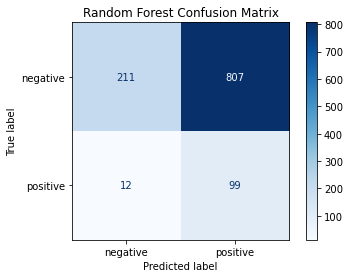

AdaBoost
Accuracy: 0.2710
Confusion matrix:
[[207 811]
 [ 12  99]]
F1 score: 0.1939
Recall score: 0.8919
Precision score: 0.1088
--------------


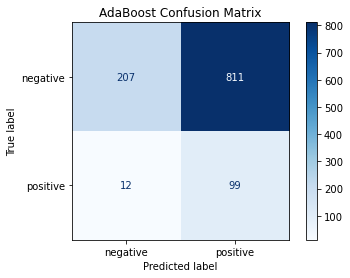

Gradient Boosting
Accuracy: 0.2666
Confusion matrix:
[[201 817]
 [ 11 100]]
F1 score: 0.1946
Recall score: 0.9009
Precision score: 0.1091
--------------


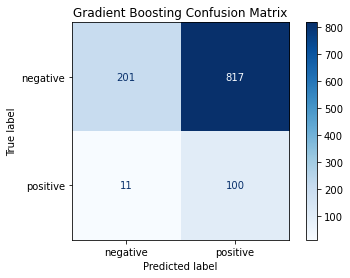

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, recall_score, precision_score
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Train and evaluate models on resampled data
models = {
    'Logistic Regression': LogisticRegression(random_state=42, max_iter=1000),
    'K Nearest Neighbors': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'AdaBoost': AdaBoostClassifier(DecisionTreeClassifier(random_state=42), random_state=42, learning_rate=0.1),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42)
}

for name, model in models.items():
    model.fit(X_train_resampled, y_train_resampled)
    y_pred = model.predict(X_test_imputed)
    acc = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, pos_label='positive')
    recall = recall_score(y_test, y_pred, pos_label='positive')
    conf_matrix = confusion_matrix(y_test, y_pred, labels=['negative', 'positive'])
    precision = precision_score(y_test, y_pred, pos_label='positive')
    print(name)
    print(f"Accuracy: {acc:.4f}")
    print(f"Confusion matrix:\n{conf_matrix}")
    print(f"F1 score: {f1:.4f}")
    print(f"Recall score: {recall:.4f}")
    print(f"Precision score: {precision:.4f}")
    print("--------------")
    
    # Plot confusion matrix
    ConfusionMatrixDisplay.from_estimator(model, X_test_imputed, y_test, cmap=plt.cm.Blues)
    plt.title(f"{name} Confusion Matrix")
    plt.show()